# Breast Cancer Detection based on Histopathology Images

## About the Data:

- **Data Source:** https://www.kaggle.com/code/nasrulhakim86/breast-cancer-histopathology-images-classification/data
- The Breast Cancer Histopathological Image Classification (BreakHis) is composed of 9,109 microscopic images of breast tumor tissue collected from 82 patients.
- The images are collected using different magnifying factors (40X, 100X, 200X, and 400X). 
- To date, it contains 2,480 benign and 5,429 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format).
- This database has been built in collaboration with the P&D Laboratory – Pathological Anatomy and Cytopathology, Parana, Brazil (http://www.prevencaoediagnose.com.br). 
- Each image filename stores information about the image itself: method of procedure biopsy, tumor class, tumor type, patient identification, and magnification factor. 
- For example, SOBBTA-14-4659-40-001.png is the image 1, at magnification factor 40X, of a benign tumor of type tubular adenoma, original from the slide 14-4659, which was collected by procedure SOB.

In [67]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import shutil


### Prepare directories

In [68]:
zoom = 400

cwd = Path().absolute()
input_path = cwd / 'breakhis'
output_path = cwd / f'breakhis_{zoom}x'


In [69]:
shutil.rmtree(output_path, ignore_errors=True)


In [70]:
os.makedirs(output_path)
os.makedirs(output_path / 'benign')
os.makedirs(output_path / 'malignant')


### Load data

In [71]:
input_data_df = pd.read_csv(input_path / 'Folds.csv')


In [72]:
input_data_df = input_data_df.rename(columns={"filename": "path"})
input_data_df.head(3)


fold  mag    grp                                               path
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...

In [73]:
input_data_df['path'][1]


'BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png'

In [74]:
input_data_df['filename'] = input_data_df['path'].apply(
    lambda x: x.split("/")[-1])
input_data_df["label"] = input_data_df['path'].apply(lambda x: x.split("/")[3])
input_data_df["patient_id"] = input_data_df['path'].apply(
    lambda x: x.split("/")[-3])


In [75]:
input_data_df = input_data_df[input_data_df.mag == zoom]


In [76]:
input_data_df.head(3)


fold  mag    grp                                               path  \
91     1  400  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
92     1  400  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
93     1  400  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   

                          filename   label          patient_id  
91  SOB_B_A-14-22549AB-400-001.png  benign  SOB_B_A_14-22549AB  
92  SOB_B_A-14-22549AB-400-002.png  benign  SOB_B_A_14-22549AB  
93  SOB_B_A-14-22549AB-400-003.png  benign  SOB_B_A_14-22549AB

### Copy data to new directory

- The given data consists of very complex structure of folders where it stores the images.
- The structure as follows:
    - BreaKHis_v1
        - histology_slides
            - breast
                - **benign**
                    - **SOB**
                        - Type
                            - **patient_id**  
                                - 40x
                                - 100x
                                - 200x
                                - 400x
                - **malignant**
                    - **SOB**
                        - Type
                            - **patient_id**   
                                - 40x
                                - 100x
                                - 200x
                                - 400x
- To make things simple, using the exact path of the images, all the images are moved to the common folder called **Cancer.**
- Images are renamed with their class and patient_id.
                

In [77]:
for i in range(len(input_data_df)):
    src = input_path / 'BreaKHis_v1' / input_data_df['path'].iloc[i]
    dest = output_path / \
        input_data_df["label"].iloc[i] / str(src).split("/")[-1]
    shutil.copyfile(src, dest)


In [78]:
print(f"Benign: {len(os.listdir(output_path / 'benign'))}")
print(f"Malignant: {len(os.listdir(output_path / 'malignant'))}")


Benign: 588
Malignant: 1232


- All the images are now stores in single folder.

In [79]:
input_data_df['file_loc'] = input_data_df['label'] + \
    "_" + input_data_df['filename']
input_data_df['class'] = input_data_df['label'].apply(
    lambda x: 0 if x == 'benign' else 1)


In [80]:
input_data_df.head(3)


fold  mag    grp                                               path  \
91     1  400  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
92     1  400  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
93     1  400  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   

                          filename   label          patient_id  \
91  SOB_B_A-14-22549AB-400-001.png  benign  SOB_B_A_14-22549AB   
92  SOB_B_A-14-22549AB-400-002.png  benign  SOB_B_A_14-22549AB   
93  SOB_B_A-14-22549AB-400-003.png  benign  SOB_B_A_14-22549AB   

                                 file_loc  class  
91  benign_SOB_B_A-14-22549AB-400-001.png      0  
92  benign_SOB_B_A-14-22549AB-400-002.png      0  
93  benign_SOB_B_A-14-22549AB-400-003.png      0

Text(0.5, 1.0, 'No of Patients Benign and Malignant')

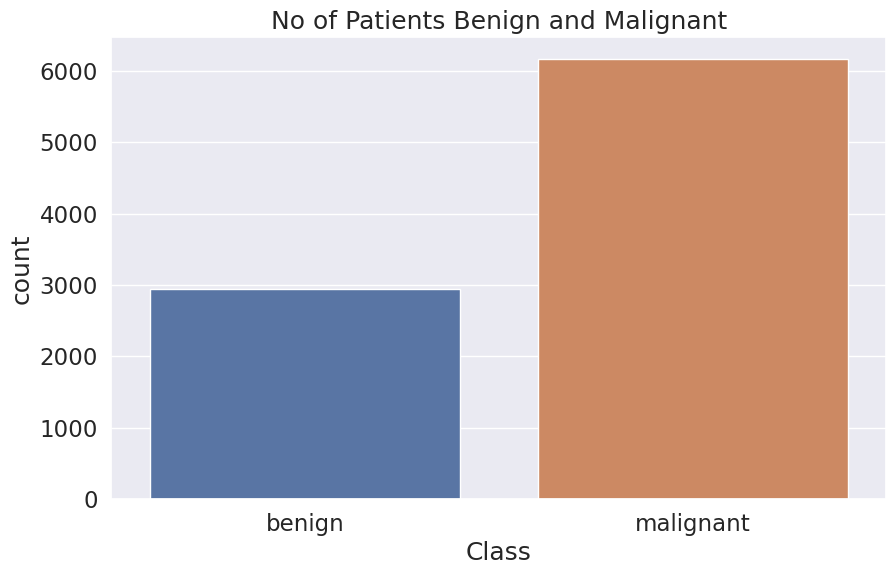

In [81]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.countplot(x=input_data_df['label'])
plt.xlabel("Class")
plt.title("No of Patients Benign and Malignant")


- Data is Highly Imabalanced as this is the case with the real world.
- Medical datas are usually imbalanced because of their nature.

In [82]:
benign_df = input_data_df[input_data_df['label'] == 'benign']
malignant_df = input_data_df[input_data_df['label'] == 'malignant']


### Benign Samples

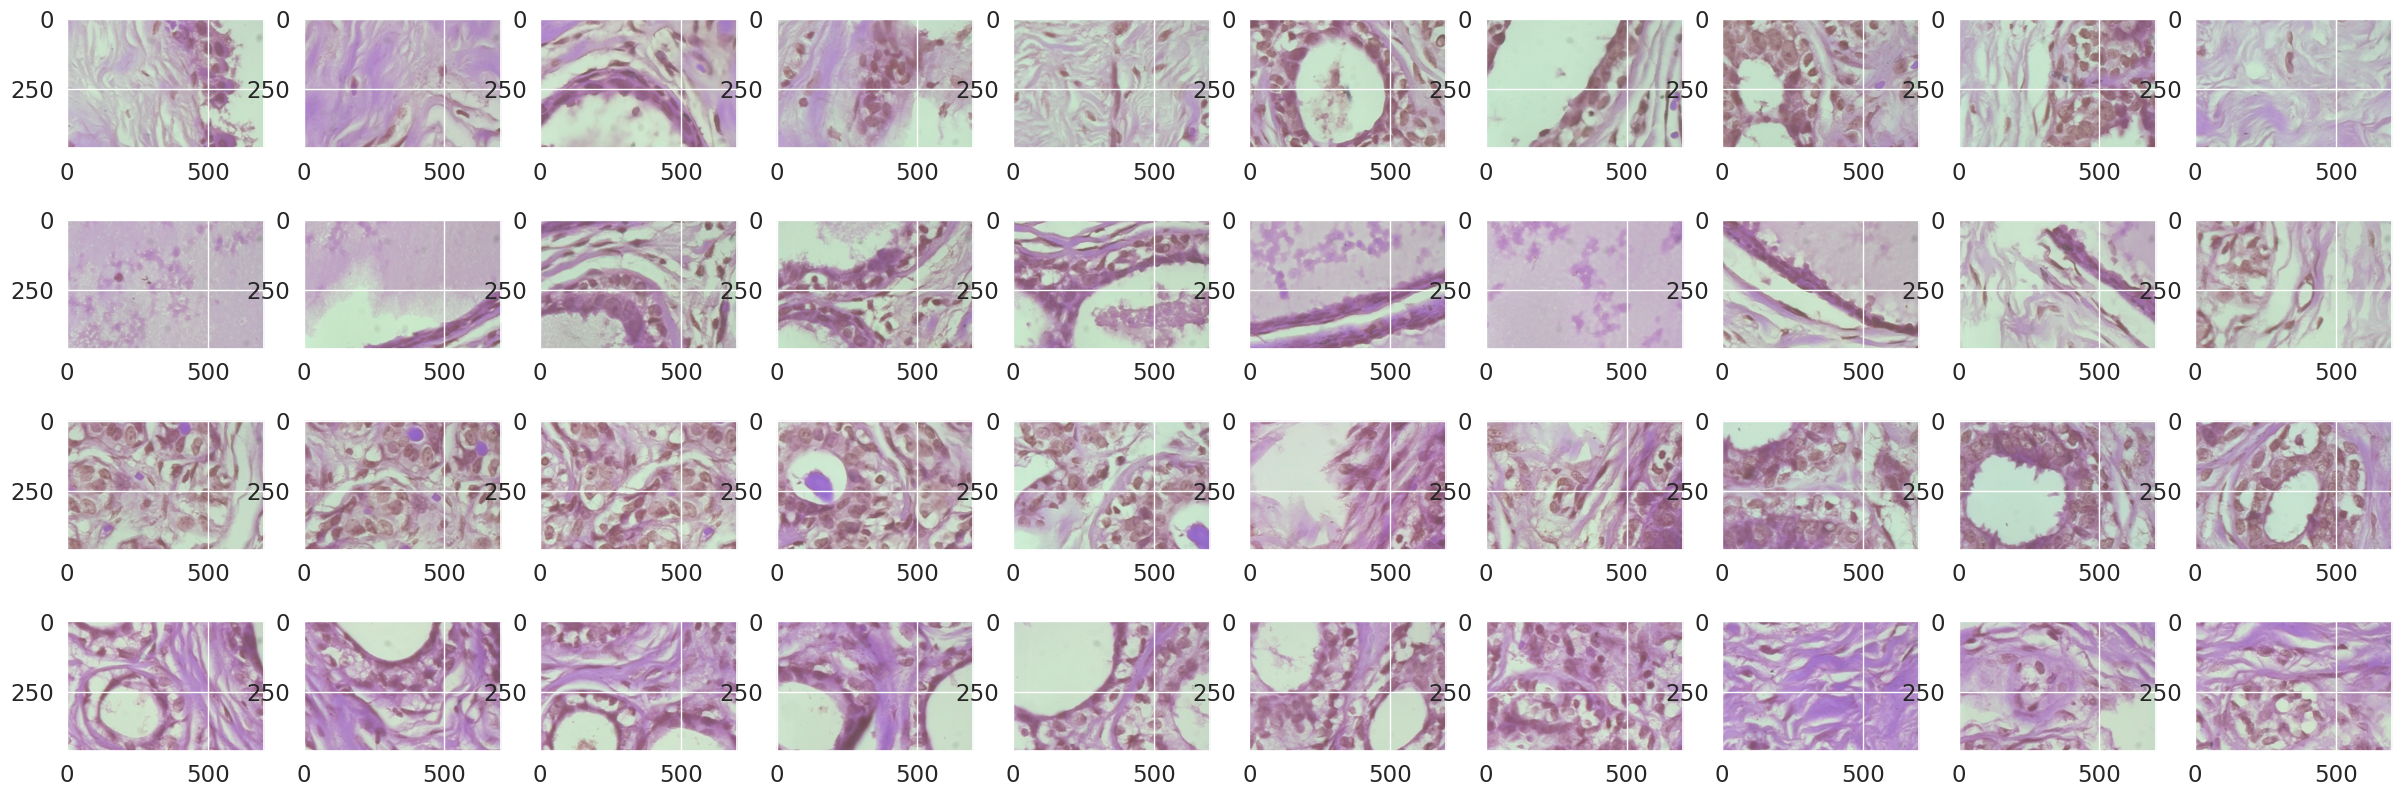

In [83]:
plt.figure(figsize=(30, 10))
for i in range(0, 40):
    plt.subplot(4, 10, i+1)
    img = cv2.imread(os.path.join(
        output_path, benign_df['label'].iloc[i], benign_df['filename'].iloc[i]), 1)
    plt.imshow(img)


### Malignant Samples

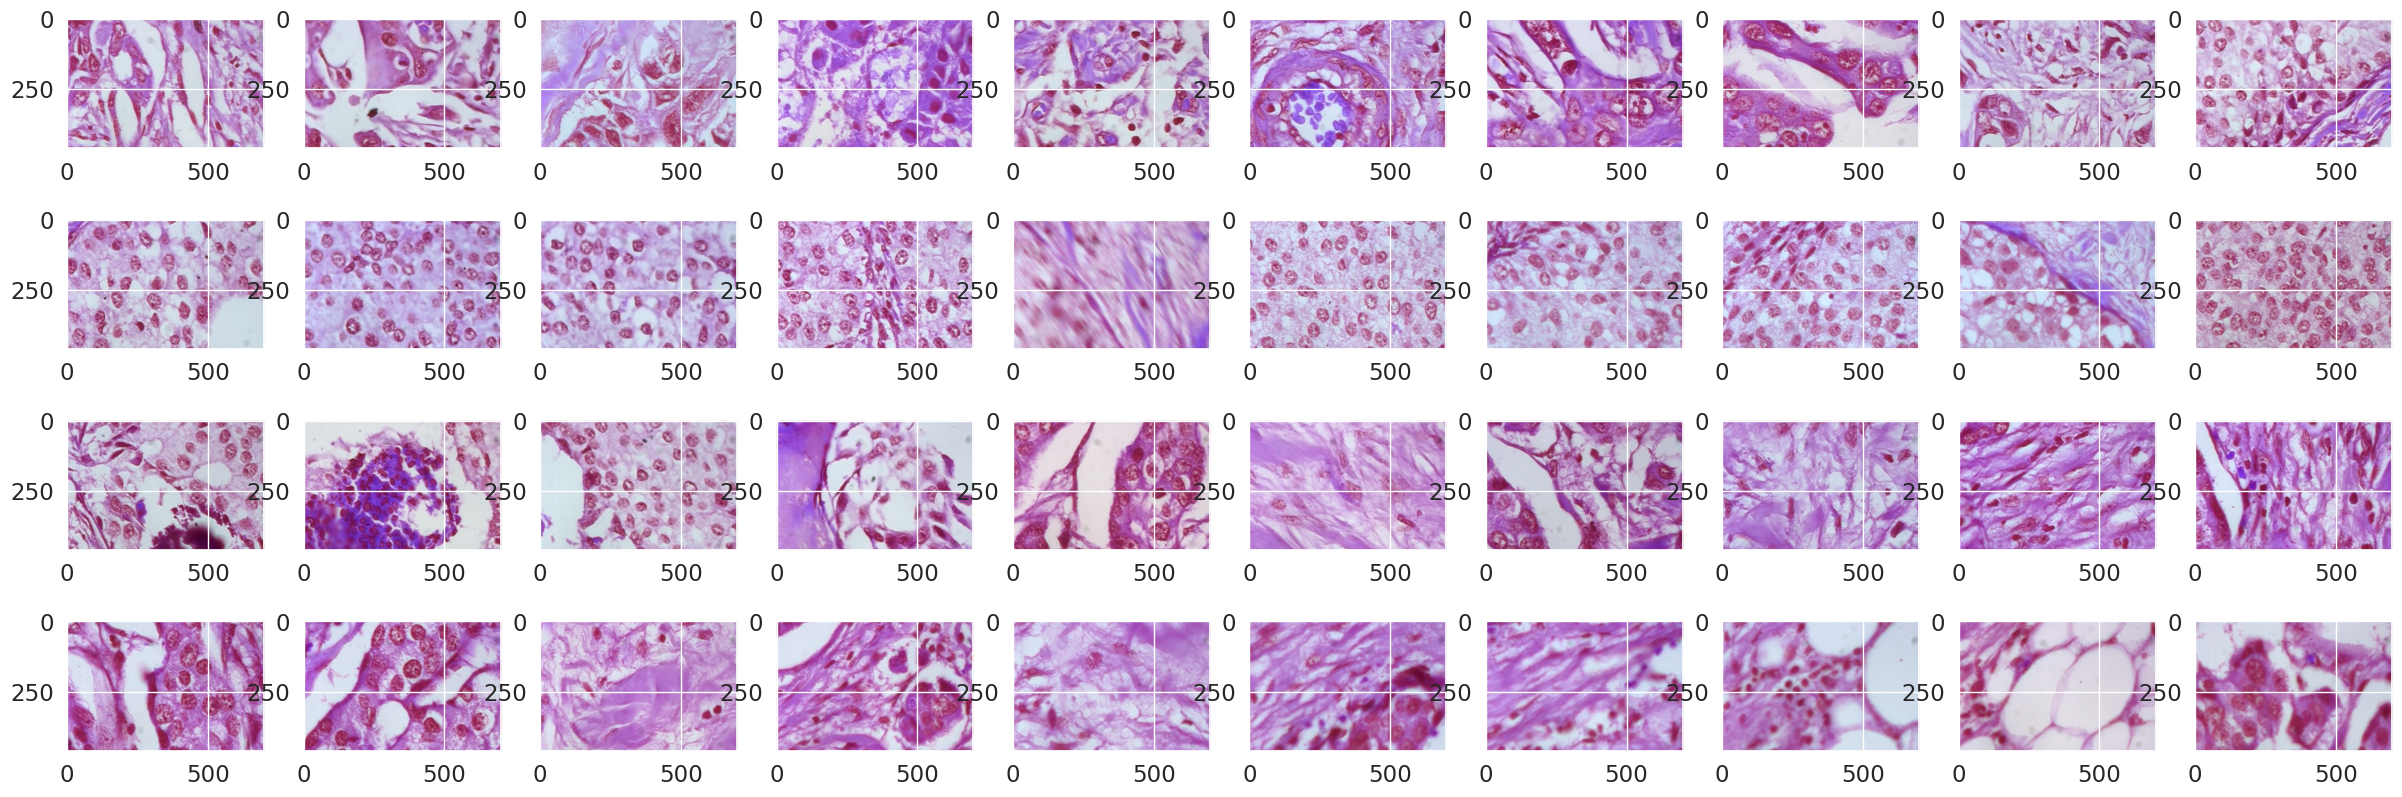

In [84]:
plt.figure(figsize=(30, 10))
for i in range(0, 40):
    plt.subplot(4, 10, i+1)
    img = cv2.imread(os.path.join(
        output_path, malignant_df['label'].iloc[i], malignant_df['filename'].iloc[i]), 1)
    plt.imshow(img)


**Findings:**

- From the above images there is very little to no difference between malignant and benign samples.
- This might be because we are not the pathologists, That's the original purpose of the detection system.
- Thus it makes it easy in the absence of actual pathologists.

In [85]:
# Creating a new data frame with the file loc as its index, label and class of the patients as its columns.
benign_files = os.listdir(output_path / 'benign')
benign_files = [f"breakhis_{zoom}x/benign/" +
                file_name for file_name in benign_files]
malignant_files = os.listdir(output_path / 'malignant')
malignant_files = [f"breakhis_{zoom}x/malignant/" +
                   file_name for file_name in malignant_files]

df = pd.DataFrame(benign_files + malignant_files)
df = df.rename(columns={0: 'file_loc'})
df.head()
df['label'] = df['file_loc'].apply(
    lambda x: 0 if x.split('/')[-1].split("_")[1] == 'B' else 1)

df['patient_id'] = df['file_loc'].apply(
    lambda x: "-".join(x.split("-")[:3]).split("/")[-1])
df.set_index("file_loc", inplace=True)

df.to_csv(os.path.join(output_path, "train_val_test.csv"))
df.head(5)


label           patient_id
file_loc                                                                      
breakhis_400x/benign/SOB_B_TA-14-13200-400-014.png      0    SOB_B_TA-14-13200
breakhis_400x/benign/SOB_B_TA-14-21978AB-400-01...      0  SOB_B_TA-14-21978AB
breakhis_400x/benign/SOB_B_PT-14-21998AB-400-03...      0  SOB_B_PT-14-21998AB
breakhis_400x/benign/SOB_B_PT-14-29315EF-400-00...      0  SOB_B_PT-14-29315EF
breakhis_400x/benign/SOB_B_TA-14-13200-400-005.png      0    SOB_B_TA-14-13200

In [86]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=.15, n_splits=2, random_state=42)
split = splitter.split(df, groups=df['patient_id'])
train_inds, test_inds = next(split)

df_train_val = df.iloc[train_inds]
df_test = df.iloc[test_inds]

# df_train_val.to_csv(os.path.join(output_path, "train_val.csv"))
# df_test.to_csv(os.path.join(output_path, "test.csv"))

print(len(df_train_val))
print(len(df_test))


1509
311


In [87]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))


all_patient_ids = df.patient_id.unique()
train_val_patient_ids = df_train_val.patient_id.unique()
test_patient_ids = df_test.patient_id.unique()

print(f"All patient IDs: {len(all_patient_ids)}")
print(f"Train patient IDs: {len(train_val_patient_ids)}")
print(f"Test patient IDs: {len(test_patient_ids)}")
print(
    f"Train + Test patient IDs: {len(test_patient_ids) + len(train_val_patient_ids)}")
print(
    f"Patient IDs shared between train_val & test splits (should be empty): {intersection(train_val_patient_ids, test_patient_ids)}")


All patient IDs: 82
Train patient IDs: 69
Test patient IDs: 13
Train + Test patient IDs: 82
Patient IDs shared between train_val & test splits (should be empty): []


Text(0.5, 1.0, 'Test set')

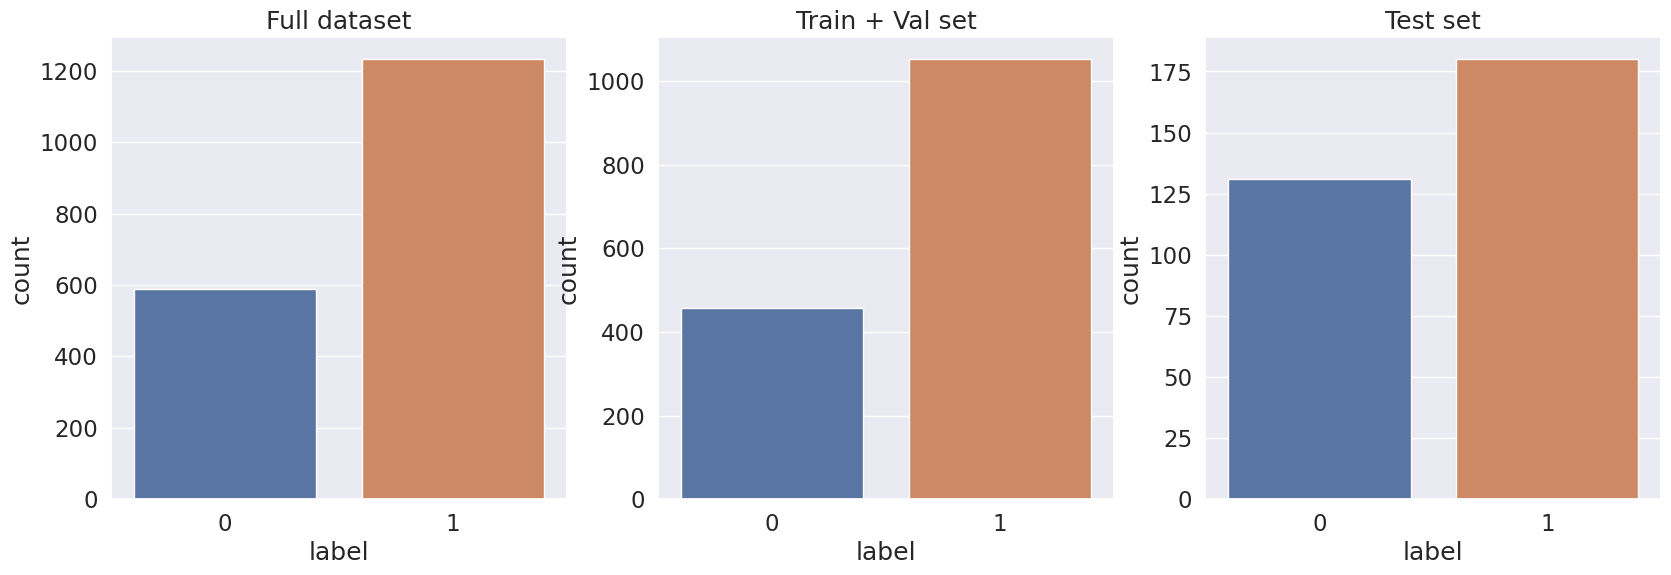

In [88]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.countplot(x=df['label'])
plt.title("Full dataset")
plt.subplot(1, 3, 2)
sns.countplot(x=df_train_val['label'])
plt.title("Train + Val set")
plt.subplot(1, 3, 3)
sns.countplot(x=df_test['label'])
plt.title("Test set")
